In [1]:
from __future__ import print_function

import tensorflow.keras as keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [2]:
batch_size = 64
num_classes = 10
epochs = 12

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# The data split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_validation = x_train[:10000]
y_validation = y_train[:10000]

x_train = x_train[10000:]
y_train = y_train[10000:]

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_validation = x_validation.reshape(x_validation.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_validation = x_validation.reshape(x_validation.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_validation = x_validation / 255.0
x_test = x_test / 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_validation.shape[0], 'validation samples')
print(x_test.shape[0], 'test samples')
print(x_train[0].sum())

x_train shape: (50000, 28, 28, 1)
50000 train samples
10000 validation samples
10000 test samples
111.62744


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_validation = keras.utils.to_categorical(y_validation, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.1)

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=sgd,
             metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_validation, y_validation))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/12
50000/50000 [==============================] - 8s 163us/sample - loss: 0.3817 - accuracy: 0.8823 - val_loss: 0.1136 - val_accuracy: 0.9654
Epoch 2/12
50000/50000 [==============================] - 6s 117us/sample - loss: 0.1306 - accuracy: 0.9608 - val_loss: 0.0876 - val_accuracy: 0.9737
Epoch 3/12
50000/50000 [==============================] - 6s 118us/sample - loss: 0.0941 - accuracy: 0.9710 - val_loss: 0.0851 - val_accuracy: 0.9754
Epoch 4/12
50000/50000 [==============================] - 6s 120us/sample - loss: 0.0762 - accuracy: 0.9763 - val_loss: 0.0520 - val_accuracy: 0.9844
Epoch 5/12
50000/50000 [==============================] - 6s 122us/sample - loss: 0.0653 - accuracy: 0.9797 - val_loss: 0.0521 - val_accuracy: 0.9853
Epoch 6/12
50000/50000 [==============================] - 6s 121us/sample - loss: 0.0567 - accuracy: 0.9818 - val_loss: 0.0476 - val_accuracy: 0.9868
Epoch 7/12
50000/50000 [==========================

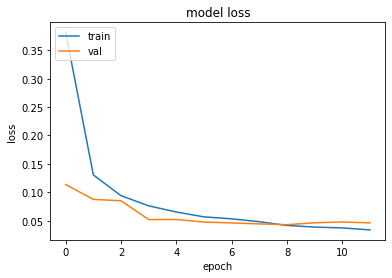

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

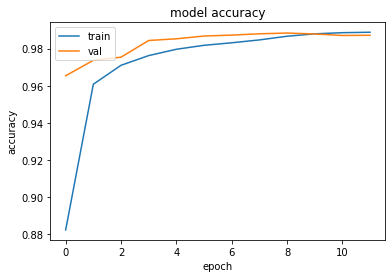

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()